<div class="alert alert-warning" role="alert"; style="border:groove rgb(57,136,235) 5px; padding: 40px">


<h1 align="center" style="margin-bottom: -10px">Анализ продаж магазина видеоигр<a class="tocSkip"></h1>
<h4 align="center" style="margin-bottom: 60px">Сборный проект №1, Яндекс Практикум<a class="tocSkip"></h4>
<h4 align="right" style="margin-bottom: -15px">Исполнитель: Воронин Артём<a class="tocSkip"></h4> 

<h1 align="center">Описание проекта</h1>
<p style="margin-bottom: 30px"></p>
<h2>Задача:<span class="tocSkip"></span></h2>

Интернет-магазин «Стримчик», занимающийся продажей видеоигр игр по всему миру, предоставил исторические данные о продажах. Для планирования рекламных кампаний магазина на следующий год необходимо провести исследовательский анализ данных и выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт.

<p style="margin-bottom: 30px"></p>
<h2> Описание данных:  <span class="tocSkip"></span></h2>

Данные добыты из открытых источников. В данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Расшифровка столбцов:

`Name` — название игры;  
`Platform` — платформа;  
`Year_of_Release` — год выпуска;  
`Genre` — жанр игры;  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий);  
`EU_sales` — продажи в Европе (миллионы проданных копий);  
`JP_sales` — продажи в Японии (миллионы проданных копий);  
`Other_sales` — продажи в других странах (миллионы проданных копий);  
`Critic_Score` — оценка критиков (максимум 100);  
`User_Score` — оценка пользователей (максимум 10);  
`Rating` — рейтинг от организации ESRB 

# 0 Подготовка к работе

## 0.1 Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import warnings
import os

from scipy import stats as st

from sklearn.utils import shuffle

## 0.2 Загрузка данных

In [2]:
def data_load(name):
    '''Загружает датасет из файла'''
    
    home_dir = os.path.abspath("")
    
    try:
        data = pd.read_csv(f'{home_dir}/{name}')
        print('Датасет успешно загружен с локалки!')
        return data    
    except:
        try:
            data = pd.read_csv(f'https://code.s3.yandex.net/datasets/{name}')
            print('Датасет успешно загружен с yandex!')
            return data
        except:  
            print(f'Ошибка месторасположения csv-файла "{name}"')

In [3]:
data = data_load('games.csv')

Датасет успешно загружен с локалки!


# 1 Предварительный обзор

In [4]:
print('Основная информация:\n')
data.info()
print('\n\nПримеры объектов:')
display(data.sample(8))
print('\n\nОписательная статистика:')
data.describe().round(2)

Основная информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Примеры объектов:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11824,World Party Games,Wii,2009.0,Misc,0.07,0.00,0.00,0.01,NaN,tbd,E
7101,Valhalla Knights 2,PSP,2008.0,Role-Playing,0.09,0.00,0.12,0.01,50.0,5.4,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.00,0.03,64.0,6.8,E10+
14085,J-League Pro Striker 2,GEN,1994.0,Sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN
282,Frogger,PS,1997.0,Action,3.79,0.27,0.00,0.11,NaN,NaN,NaN
6498,Gundam Battle Universe,PSP,2008.0,Fighting,0.00,0.00,0.26,0.00,NaN,NaN,NaN
8448,Resident Evil,SAT,1997.0,Action,0.00,0.00,0.17,0.00,NaN,NaN,NaN
7396,WinBack: Covert Operations,N64,1999.0,Shooter,0.17,0.04,0.00,0.00,NaN,NaN,NaN




Описательная статистика:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


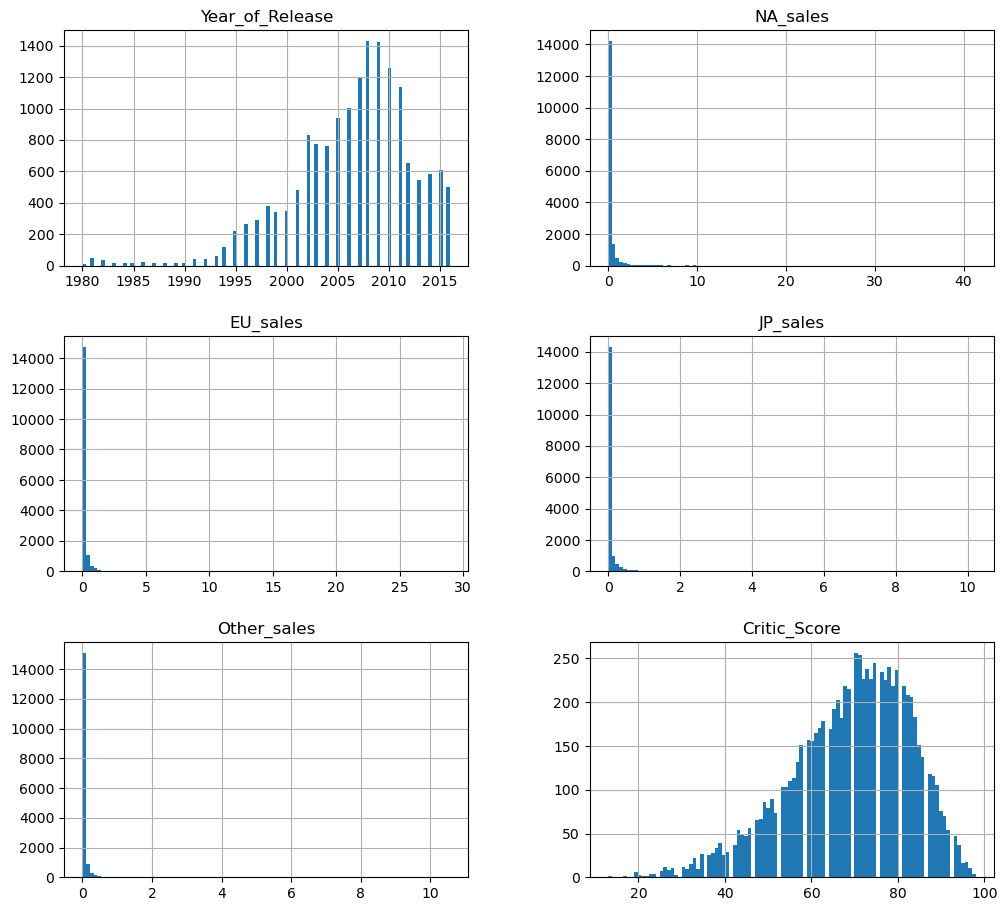

In [5]:
data.hist(figsize=(12, 11), bins=100);

**Пропуски**

In [6]:
def pass_value_barh(df):
    '''Строит гистограмму пропусков и их суммарную долю в %'''
    
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(11, 4), legend=False, fontsize=14)
            .set_title('Гистограмма пропусков' + "\n", fontsize=22, color='SteelBlue')    
        );   
        print('\nДоля пропусков: {:.2%}'.format(df.isna().mean().mean()))
    except:
        plt.close();
        print('Пропусков нет 😎')


Доля пропусков: 12.14%


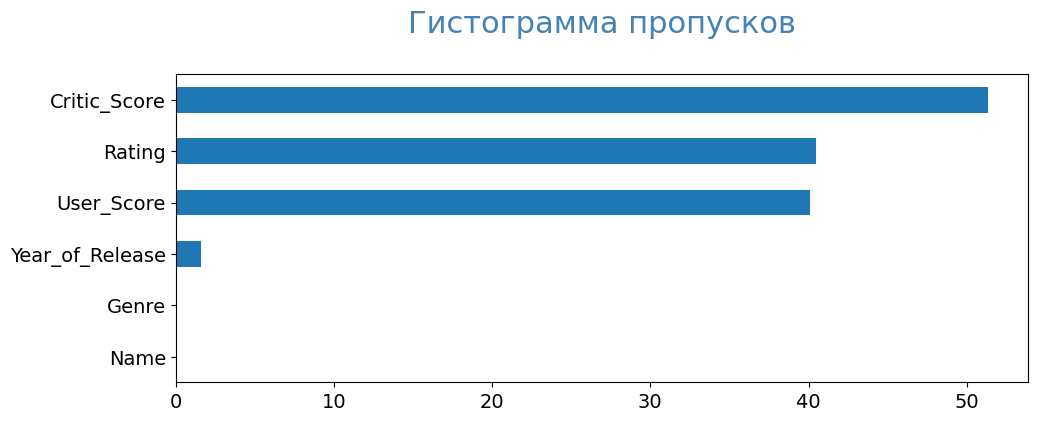

In [7]:
pass_value_barh(data)

**Дубликаты**

In [8]:
print('Кол-во явных дубликатов:', data.duplicated().sum())

Кол-во явных дубликатов: 0


**Вывод:**

Предварительный обзор данных показал, что:

- таблица с данными имеет 16715 записей;
- кол-во признаков - 11;
- в таблице присутствуют данные за большой период - с 1980 по 2016 год;
- явные дубликаты в данных отсутствуют;
- в данных присутствует около 12% пропусков.

# 2 Предобработка данных

## 2.1 Замена названий столбцов

Приведем все названия столбцов к нижнему регистру:

In [9]:
data.columns = data.columns.str.lower()

data.columns   # проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2 Обработка пропусков

In [10]:
def count_na(row):     
    '''Функция подсчета кол-ва пропусков (для сводных таблиц)'''
    
    return row.isna().sum()

In [11]:
def na_info(row):
    '''Функция вывода информации'''
    
    na = data[row].isna()
    print('Кол-во пропусков столбца {}: {} \nДоля: {:.2%}'.format(row, na.sum().sum(), na.mean().mean()))
    

In [12]:
data.isna().sum()   # суммарное кол-во пропусков по столбцам

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В датасете пропущено около 12% значений.   
В данном разделе будем удалять пропуски, руководствуясь главным принципом - **заполнять пропуски только в необходимых для анализа столбцах и, если можно проводить анализ, имея пропуски в данных - лучше отказаться от их заполнения.**

### 2.2.1 `year_of_release`

**Предварительный обзор данных:**

In [13]:
na_info('year_of_release')

Кол-во пропусков столбца year_of_release: 269 
Доля: 1.61%


In [14]:
data['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Аномалии отсутствуют.  
Построим сводную таблицу и взглянем на распределение пропусков:

In [15]:
year_of_release = data.pivot_table(
    index=['name', 'platform'],
    values=['year_of_release', 'na_sales'], 
    aggfunc={'year_of_release': [count_na, 'count'],
            'na_sales': 'count'})

year_of_release.sort_values(by=('year_of_release', 'count_na'), ascending=False).head(20)

na_sales  \
                                                          count   
name                                          platform            
DanceDanceRevolution II                       Wii             1   
Housekeeping                                  DS              1   
The Hidden                                    3DS             1   
Tribes: Aerial Assault                        PS2             1   
Street Hoops                                  GC              1   
Final Fantasy XI                              PS2             1   
Reader Rabbit 2nd Grade                       Wii             1   
Luxor: Pharaoh's Challenge                    Wii             1   
The History Channel: Great Battles - Medieval PS3             1   
Demon Chaos                                   PS2             1   
Get Fit with Mel B                            X360            1   
Egg Monster Hero                              DS              1   
Record of Agarest War Zero                    PS3             1   
Triple Play 99                                PS              1   
Luminous Arc 2 (JP sales)                     DS              1   
Jonah Lomu Rugby Challenge                    PS3             1   
Captain America: Super Soldier                DS              1   
                                              Wii             1   
Half-Minute Hero 2                            PSP             1   
Sonic the Hedgehog                            PS3             2   

                                                       year_of_release  \
                                                                 count   
name                                          platform                   
DanceDanceRevolution II                       Wii                    0   
Housekeeping                                  DS                     0   
The Hidden                                    3DS                    0   
Tribes: Aerial Assault                        PS2                    0   
Street Hoops                                  GC                     0   
Final Fantasy XI                              PS2                    0   
Reader Rabbit 2nd Grade                       Wii                    0   
Luxor: Pharaoh's Challenge                    Wii                    0   
The History Channel: Great Battles - Medieval PS3                    0   
Demon Chaos                                   PS2                    0   
Get Fit with Mel B                            X360                   0   
Egg Monster Hero                              DS                     0   
Record of Agarest War Zero                    PS3                    0   
Triple Play 99                                PS                     0   
Luminous Arc 2 (JP sales)                     DS                     0   
Jonah Lomu Rugby Challenge                    PS3                    0   
Captain America: Super Soldier                DS                     0   
                                              Wii                    0   
Half-Minute Hero 2                            PSP                    0   
Sonic the Hedgehog                            PS3                    1   

                                                                 
                                                       count_na  
name                                          platform           
DanceDanceRevolution II                       Wii             1  
Housekeeping                                  DS              1  
The Hidden                                    3DS             1  
Tribes: Aerial Assault                        PS2             1  
Street Hoops                                  GC              1  
Final Fantasy XI                              PS2             1  
Reader Rabbit 2nd Grade                       Wii             1  
Luxor: Pharaoh's Challenge                    Wii             1  
The History Channel: Great Battles - Medieval PS3             1  
Demon Chaos       

In [16]:
year_of_release.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16709 entries, (' Beyblade Burst', '3DS') to ('¡Shin Chan Flipa en colores!', 'DS')
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   (na_sales, count)            16709 non-null  int64
 1   (year_of_release, count)     16709 non-null  int64
 2   (year_of_release, count_na)  16709 non-null  int64
dtypes: int64(3)
memory usage: 531.2+ KB


Из таблицы вдино, что пропуски есть не во всех строчках одной и той же игры. Это связано с тем, что игры выходят на разных консолях. Но, чаще всего год выхода игры одинаковый. Попробуем восстановить поропуски из имеющихся данных функцией со следующим **алгоритмом:** 

На вход подается строка таблицы. Если значение в столбце `year_of_release` - NaN, то обращаемся к названию игры с целью найти там цифры года, пробегаясь по списку возможных значений, составленному из уникальных значений всей колонки датасета. Если это не удалось,то из всей таблицы делается выборка строк по названию игры (столбец `name`) и находится мода по значениям столбца `year_of_release` из этой выборки. Если параметр года пропущен у всех строк этой выборки - оставляем пропуски как есть.

In [17]:
def year_of_release_fillna(row):
    '''Функция замены пропусков для столбца year_of_release'''
    
    if row['year_of_release'] != row['year_of_release']:
        # поиск года в названии игры
        for year in range(1980, 2017):
            if str(year) in row['name']:
                return year                                                       
        # иначе возвращаем моду   
        return sts.mode(data[data['name'] == row['name']]['year_of_release'])
    # иначе оставляем как есть    
    return row['year_of_release']

In [18]:
data['year_of_release'] = data.apply(year_of_release_fillna, axis=1)

Посмотрим на данные после обработки:

In [19]:
na_info('year_of_release')

Кол-во пропусков столбца year_of_release: 177 
Доля: 1.06%


Кол-во пропусков в столбце уменьшилось на **треть**.

Преобразуем тип данных в целочисленный

In [20]:
data['year_of_release'] = data['year_of_release'].astype('Int64')     

In [21]:
data.info()     # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16538 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


**Вывод:**

Было обработано около 35% пропусков столбца, причем все строки таблицы сохранились. Пропуски в этом столбце вероятнее всего возникли по причине ошибки при выгрузке данных, либо были незаполнены изначально.

### 2.2.2 `name` и `genre`

Исходя из **п.2.2** в данных столбцах имеется по 2 пропуска. Удалим их, т.к. число крайне невелико.

In [22]:
data.dropna(subset=['name', 'genre'], inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16536 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


### 2.2.3  `critic_score`

**Предварительный обзор данных:**

In [24]:
na_info('critic_score')

Кол-во пропусков столбца critic_score: 8576 
Доля: 51.31%


In [25]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [26]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Аномалий в данных нет.
Построим сводную таблицу и взглянем на распределение пропусков:

In [27]:
critic_score = data.pivot_table(
    index=['name', 'platform'],
    values=['critic_score', 'na_sales'], 
    aggfunc={'critic_score': [count_na, 'count'],
            'na_sales': 'count'})

(critic_score[critic_score[('critic_score', 'count_na')] > 0]).sort_values(by=('critic_score', 'count_na')).head(20)

critic_score           \
                                                             count count_na   
name                                         platform                         
 Beyblade Burst                              3DS                 0        1   
Quiz Magic Academy DS: Futatsu no Jikuu Koku DS                  0        1   
Quiz Magic Academy DS                        DS                  0        1   
Quick Yoga Training                          DS                  0        1   
Quest 64                                     N64                 0        1   
Queen's Gate: Spiral Chaos                   PSP                 0        1   
Queen's Blade: Spiral Chaos                  PSP                 0        1   
Qubed                                        X360                0        1   
Quake II                                     PS                  0        1   
                                             N64                 0        1   
Quake                                        N64                 0        1   
Qix                                          GB                  0        1   
QUIZ PARTY                                   Wii                 0        1   
Q*bert                                       PS                  0        1   
                                             2600                0        1   
Puzzler World 2                              DS                  0        1   
Puzzler World                                DS                  0        1   
Puzzler Collection                           Wii                 0        1   
Puzzler Brain Games                          Wii                 0        1   
Puzzle Star Sweep                            PS                  0        1   

                                                      na_sales  
                                                         count  
name                                         platform           
 Beyblade Burst                              3DS             1  
Quiz Magic Academy DS: Futatsu no Jikuu Koku DS              1  
Quiz Magic Academy DS                        DS              1  
Quick Yoga Training                          DS              1  
Quest 64                                     N64             1  
Queen's Gate: Spiral Chaos                   PSP             1  
Queen's Blade: Spiral Chaos                  PSP             1  
Qubed                                        X360            1  
Quake II                                     PS              1  
                                             N64             1  
Quake                                        N64             1  
Qix                                          GB              1  
QUIZ PARTY                                   Wii             1  
Q*bert                                       PS              1  
                                             2600            1  
Puzzler World 2                              DS              1  
Puzzler World                                DS              1  
Puzzler Collection                           Wii             1  
Puzzler Brain Games                          Wii             1  
Puzzle Star Sweep                            PS              1

Обработаем пропуски по похожему алгоритму из **п.2.2.1**:

In [28]:
def critic_score_fillna(row):  
    '''Функция замены пропусков для столбца critic_score'''
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = row['critic_score']
        # проверка на пропуск
        if result != result:
            # замена медианой
            result = np.nanmedian(
                data.loc[(data['name'] == row["name"]) & 
                         (data['platform'] == row['platform'])]['critic_score']
            )
            return result
        
    return row['critic_score']

In [29]:
data['critic_score'] = data.apply(critic_score_fillna, axis=1)

na_info('critic_score')

Кол-во пропусков столбца critic_score: 8576 
Доля: 51.31%


In [30]:
data.info()     # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16536 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


**Вывод:**

Кол-во пропущенных значений в столбце не изменилось, значит одинаковых строчек по названию игры и платформы нет. На данном этапе работы корректно заполнит пропуски нельзя.

### 2.2.4 `user_score`

**Предварительный обзор данных:**

In [31]:
na_info('user_score')

Кол-во пропусков столбца user_score: 6699 
Доля: 40.08%


In [32]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [33]:
data['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Аббревиатура tbd расшифровывается, как "To be determined", что значит будет определено позже. По сути это теже самые пропуски. Изменим их на NaN и попробуем обработать все пропуски как в пердыдущем пункте.

In [34]:
data['user_score'] = data['user_score'].replace("tbd", np.nan)
data['user_score'].value_counts(dropna=False).head()

NaN    9123
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64

Изменим тип данных на числовой:

In [35]:
data['user_score'] = data['user_score'].astype(float)

In [36]:
na_info('user_score') # до замены

Кол-во пропусков столбца user_score: 9123 
Доля: 54.59%


In [37]:
def user_score_fillna(row):  
    '''Функция замены пропусков для столбца user_score'''
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = row['user_score']  
        # проверка на пропуск
        if result != result:  
            # замена на медиану
            result = np.nanmedian(
                data.loc[(data['name'] == row["name"]) & 
                         (data['platform'] == row['platform'])]['user_score'])
            return result
        
    return row['user_score']

In [38]:
data['user_score'] = data.apply(user_score_fillna, axis=1)
na_info('user_score')  # после замены

Кол-во пропусков столбца user_score: 9123 
Доля: 54.59%


In [39]:
data.info()     # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16536 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Вывод:**

Аналогично, кол-во пропусков не изменилось, что означает, что совпадений строк по играм и консолям нет. На данном этапе работы корректно заполнить пропуски нельзя. 

### 2.2.5 `rating`

**Предварительный обзор данных:**

In [40]:
na_info('rating')   # до обработки

Кол-во пропусков столбца rating: 6764 
Доля: 40.47%


In [41]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [42]:
def rating_fillna(row):  
    '''Функция замены пропусков для столбца rating'''    
    
    try:
        result = row['rating'] 
        # проверка на пропуск
        if result != result:
            # замена модой
            result = sts.mode(
                data.loc[(data['name'] == row["name"]) & 
                         (data['platform'] == row['platform'])]['rating'])
            return (result, row['rating'])[result != result]
        return row['rating']
    
    except StatisticsError:        
        return row['rating']

In [43]:
data['rating'] = data.apply(rating_fillna, axis=1)
na_info('rating')   # после обработки

Кол-во пропусков столбца rating: 6764 
Доля: 40.47%


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16536 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Кол-во пропусков также не изменилось, что означает, что совпадений строк по играм и консолям так же нет. На данном этапе работы корректно заполнить пропуски нельзя.

Для последующего корректного анализа заменим значения NaN на 'unknown':

In [45]:
data['rating'].fillna('Неизвестен', inplace=True)
data['rating'].unique()     # проверка

array(['E', 'Неизвестен', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [46]:
data['rating'].value_counts(dropna=False)

Неизвестен    6764
E             3990
T             2961
M             1563
E10+          1420
EC               8
K-A              3
RP               3
AO               1
Name: rating, dtype: int64

Согласно информации в сети:
+ «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими;   
 **Объеденим с "Е"**


+ «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга;  
 **По сути тот же 'unknown'. Объединим их.**


+ «K-A» («Kids to Adults») - Игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E;
 **Объеденим с "Е"**


+ «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;       
 **Т.к. значение всего одно, можно объеденить с "М".**

Добавим новый столбец `ESRB_description`, для более понятного обозначения рейтинга и произведем все вышеописанные замены:

In [47]:
raiting_replace_dict = {
    'E': 'Для всех',
    'T': '13-19 лет',
    'M': '> 17 лет',
    'E10+': '> 10 лет',
    'EC': 'Для всех',
    'RP': 'Неизвестен',
    'K-A': 'Для всех',
    'AO': '> 17 лет',
    'Неизвестен': 'Неизвестен'
    }

data['ESRB_description'] = data['rating'].map(raiting_replace_dict)
data['ESRB_description'].value_counts(dropna=False)     # проверка

Неизвестен    6767
Для всех      4001
13-19 лет     2961
> 17 лет      1564
> 10 лет      1420
Name: ESRB_description, dtype: int64

## 2.3 `total_sales`

Добавим в таблицу новый столбец с сумарными продажами по всем регионам:

In [48]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

data.head()     # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ESRB_description,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Неизвестен,Неизвестен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Неизвестен,Неизвестен,31.38


## 2.4 Дубликаты

In [49]:
print('Кол-во явных дубликатов:', data.duplicated().sum())

Кол-во явных дубликатов: 0


**Вывод:**

Явных дубликатов нет

## 2.5 Общий взгляд на аномалии и распределения числовых данных

In [50]:
# Показатели о кол-ве игр в датасете, минимальных и максимальных значениях 
(
    data[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 
          'other_sales', 'critic_score',  'user_score', 'total_sales']]
    .apply (['count', 'min', 'max'])   
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16536,16713.00,16713.00,16713.00,16713.00,8137.0,7590.0,16713.00
min,1980,0.00,0.00,0.00,0.00,13.0,0.0,0.00
max,2016,41.36,28.96,10.22,10.57,98.0,9.7,82.54


In [51]:
# Значения параметров выпущенных игр на разных квантилях

(
    data[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 
          'other_sales', 'critic_score',  'user_score', 'total_sales']]
    .quantile([0.01, .5, .90, .9976])  
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0.0100,1987,0.00,0.000000,0.000000,0.000000,31.0,2.3,0.010000
0.5000,2007,0.08,0.020000,0.000000,0.010000,71.0,7.5,0.170000
0.9000,2014,0.61,0.350000,0.170000,0.100000,85.0,8.7,1.200000
0.9976,2016,6.06,3.896736,3.026736,1.356736,96.0,9.4,12.647824


**Вывод:**

Аномалии и выбросы обработаны.

## 2.6 Вывод по разделу

В ходе предобработки данных было выполнено:
+ заменены названия столбцов, путем перевода в нижний регистр;
+ обработаны пропуски в столбце с годом релиза, в результате чего удалось заменить около 35% пропусков в столбце;
+ обработаны пропуски в столбце пользовательских оценок;
+ обработаны пропуски в столбце рейтинга и произведены замены;
+ в остальных столбцах, в ходе анализа данных, работа по замене пропусков не представляется возможной;
+ заменены типы данных в столбцах с годом релиза на целочисленный, а оценкой пользователей на числовой;
+ добавлен новый столбец - суммарные продажи;
+ обработаны аномалии и выбросы в данных.

# 3 Исследовательский анализ данных

In [52]:
color = ['r', 'b', 'g', 'y', 'm', 'c', 'k']    # цвета для графиков

## 3.1 Оценка продаж по годам

Построим сводную таблицу продаж игр по годам и проанализируем распределение данных:

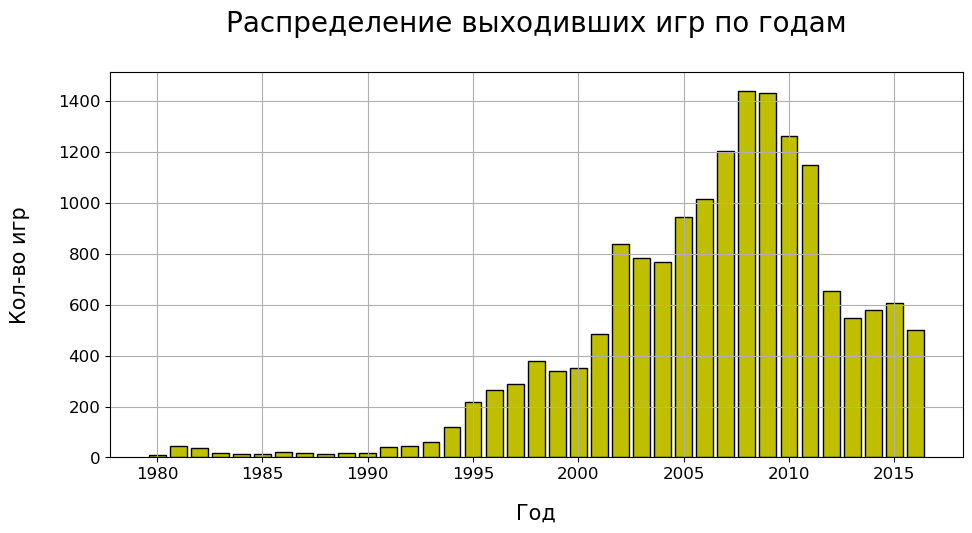

In [85]:
release_by_year = data.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count')


plt.figure(figsize=(11, 5))
plt.bar(release_by_year.index, release_by_year['name'], 
        color=np.random.choice(color), edgecolor='black');

plt.title('Распределение выходивших игр по годам\n', fontsize=20)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.xticks(fontsize=12)
plt.ylabel('Кол-во игр', fontsize=15, labelpad=20)
plt.yticks(fontsize=12)
plt.grid('on')
plt.show()

**Вывод:**

По гистограмме можно сказать, что самый пик продаж пришелся на 2008-2009 годы. Периодом активного выхода игр условно можно считать 2002-2016 годы. Фаза роста началась с 1993 года.

## 3.2 Оценка продаж по платформам

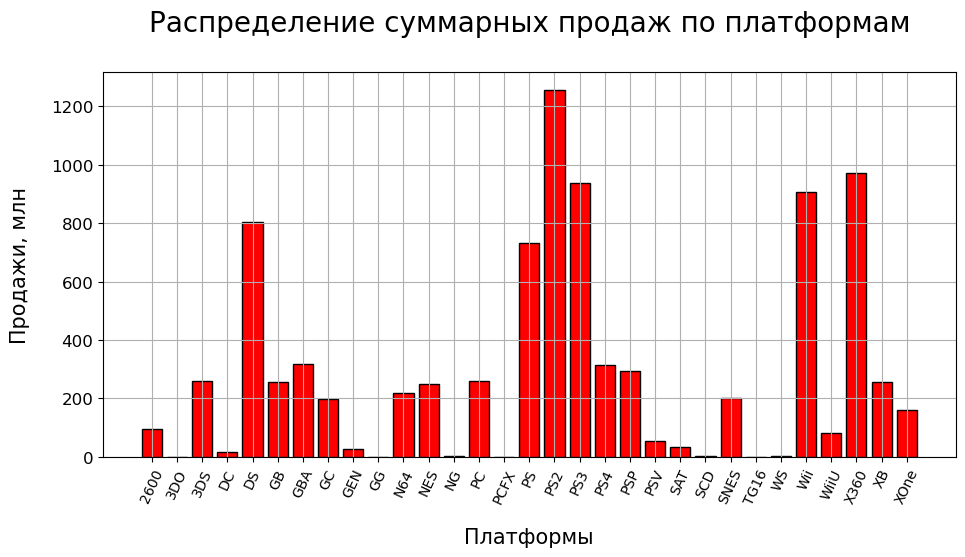

In [96]:
sales_by_platform = data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
)

plt.figure(figsize=(11, 5))
plt.bar(sales_by_platform.index, sales_by_platform['total_sales'], 
        color=np.random.choice(color), edgecolor='black')

plt.title('Распределение суммарных продаж по платформам\n', fontsize=20)
plt.xlabel('Платформы', fontsize=15, labelpad=15)
plt.xticks(fontsize=10, rotation=65)
plt.ylabel('Продажи, млн', fontsize=15, labelpad=15)
plt.yticks(fontsize=12)
plt.grid('on')
plt.show()

Платформы лидеры по кол-ву продаж:

In [55]:
sales_by_platform.sort_values(by=('total_sales'), ascending=False).head(6)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


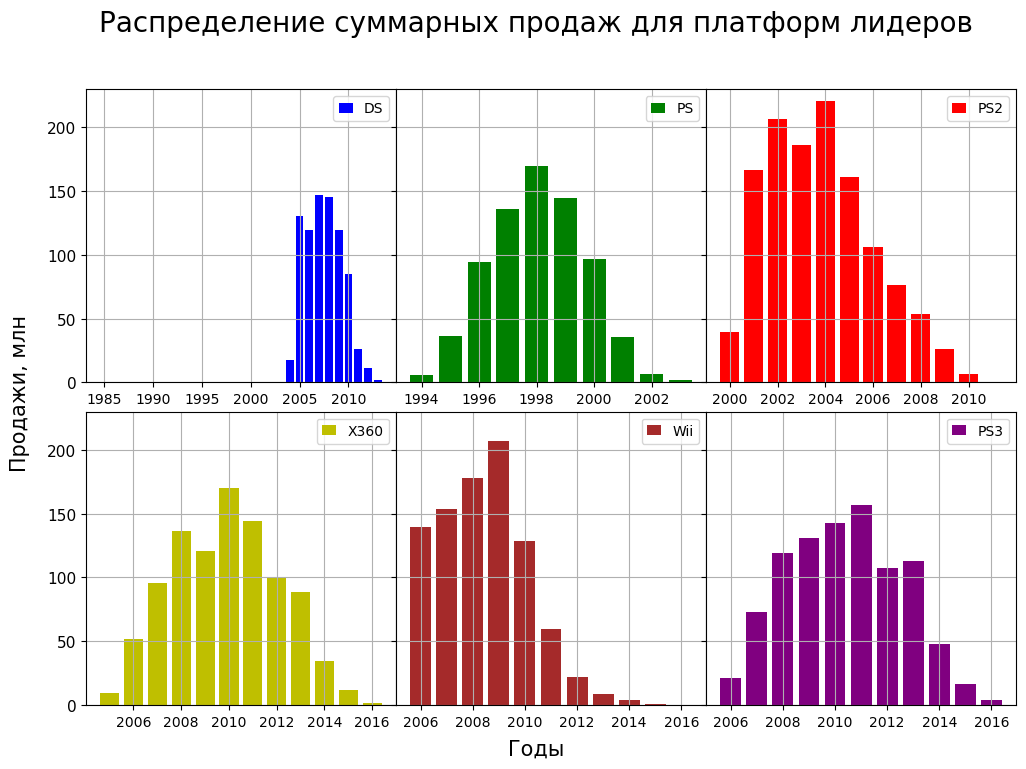

In [99]:
sbp = ['DS', 'PS', 'PS2', 'X360', 'Wii', 'PS3']

fig = plt.figure(figsize=(12, 8))
fig.suptitle('Распределение суммарных продаж для платформ лидеров', fontsize=20)
axs = fig.add_gridspec(2, 3, hspace=0.1, wspace=0.001).subplots()
fig.text(0.5, 0.055, 'Годы', ha='center', va='center', size=15)
fig.text(0.07, 0.5, 'Продажи, млн', ha='center', va='center', rotation='vertical', size=15)

colors = ['blue', 'green', 'red', 'y', 'brown', 'purple']

for i in range(len(sbp)): 
    table = (
            data[data['platform'] == sbp[i]]
            .pivot_table(
                index='year_of_release',
                values='total_sales',
                aggfunc='sum')
            )
    
    f = axs[(0, 1)[i>2], (i, (i*2)//2-3)[i>2]]
    
    f.bar(
        table.index, 
        table['total_sales'],
        color=colors[i]
        )    
    
    f.tick_params(axis='x', labelsize=10)
    f.tick_params(axis='y', labelsize=11)
    f.set_ylim([0, 230])
    f.grid('on')
    f.legend([sbp[i]], fontsize=10, handlelength=1)
    if i in [1,2,4,5]:
        f.set_yticklabels([])

**Вывод:**

На гистограммах хорошо прослеживается, что в среднем жизненный цикл платформ составляет примерно 10 лет.

## 3.3 Оценка лидерства продаж по платформам

На основании **п.3.1** бОльшая часть выхода игр начинается с 2002 года. Однако на гистограммах **п.3.2** видно, что жизненный цикл консолей в среднем лежит в пределах 10 лет. Для определения актуального периода, возьмем предварительную выборку с 2008 года и построим сводную таблицу:

In [57]:
actual = (
    data.query('year_of_release > 2008', engine='python')
        .pivot_table(
            index='platform',
            columns='year_of_release',
            values='total_sales',
            aggfunc='sum'
                    )
        )

actual

year_of_release,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,
3DS,NaN,0.30,63.20,51.36,56.57,43.76,27.78,15.14
DS,119.56,85.02,26.33,11.01,1.54,NaN,NaN,NaN
PC,17.05,26.15,35.14,23.23,13.01,13.28,8.52,5.25
PS2,26.40,6.59,0.45,NaN,NaN,NaN,NaN,NaN
PS3,130.93,142.43,157.13,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,38.58,35.04,17.82,7.69,3.38,0.24,0.12,NaN
PSV,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,206.97,128.67,59.79,21.71,8.59,3.75,1.14,0.18


Заменим пропуски в таблице на 0, чтобы увидеть эти значения на графике.
Для наглядности добавим столбец `sum` с сумарными продажами по всем годам.

In [58]:
actual = actual.fillna(0)
actual['sum'] = sum([actual[i] for i in actual.columns])

actual.sort_values(by='sum', ascending=False)     # сортировка по суммам продаж

year_of_release,2009,2010,2011,2012,2013,2014,2015,2016,sum
platform,,,,,,,,,
PS3,130.93,142.43,157.13,107.36,113.25,47.76,16.82,3.60,719.28
X360,120.79,170.10,144.09,99.75,88.58,34.74,11.96,1.52,671.53
Wii,206.97,128.67,59.79,21.71,8.59,3.75,1.14,0.18,430.80
PS4,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
3DS,0.00,0.30,63.20,51.36,56.57,43.76,27.78,15.14,258.11
DS,119.56,85.02,26.33,11.01,1.54,0.00,0.00,0.00,243.46
XOne,0.00,0.00,0.00,0.00,18.96,54.07,60.14,26.15,159.32
PC,17.05,26.15,35.14,23.23,13.01,13.28,8.52,5.25,141.63
PSP,38.58,35.04,17.82,7.69,3.38,0.24,0.12,0.00,102.87


Сделаем выборку по лидерам (ТОП-7) суммарных продаж по годам:

In [59]:
actual = actual.sort_values(by='sum', ascending=False).head(7)
actual.drop('sum', axis=1, inplace=True)

Визуализируем получившиеся итоговые данные сводной таблицы на графиках:

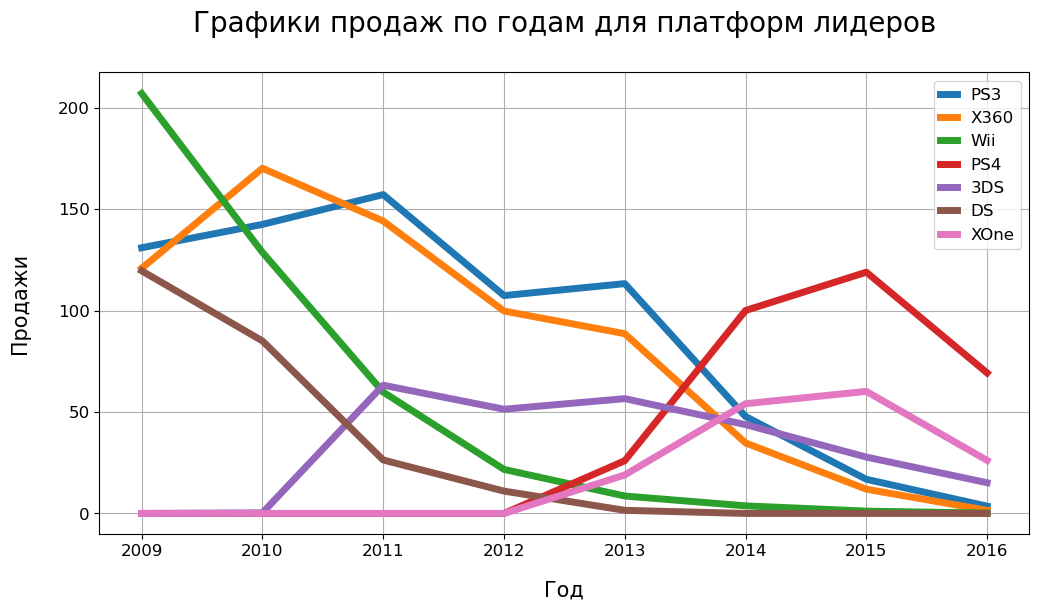

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))

for i in actual.index:
    sns.lineplot(x=actual.columns, y=actual.loc[i], linewidth=5, label=i)
    ax.legend(fontsize=12, handlelength=1)

ax.set_title('Графики продаж по годам для платформ лидеров'+'\n', fontsize=20)
plt.grid('on')
plt.tick_params(labelsize=12)
plt.xlabel('Год', fontsize=15, labelpad=15)
plt.ylabel('Продажи', fontsize=15, labelpad=20)
plt.show()

**Вывод:** 

+ У большинства платформ на графиках наблюдается спад продаж, платформы устаревают;
+ В 2016 году спад по продажам игр наблюдался на всех платформах;
+ К **потенциально прибыльным платформам** на тот момент времени я бы отнес PS4 и XOne т.к. на протяжении 3 предыдущих лет у них наблюдался рост;
+ Продажи игр на PS3 резко начали падать с выходом PS4 в 2013 году, что логично. Та же картина наблюдается и у X360 с XOne.
+ Согласно описанному ранее жизненному циклу платформ, логично предположить, что следующая смена произошла бы в 2020 году.
+ Несмотря на это, наибольшие продажи были у платформ Wii, X360, PS3, PS2 пятью годами ранее.

На основании всего вышеописанного можно сказать, что игровая индустрия очень динамична и за актуальный период лучше взять последние **2013-2016 года**.

## 3.4 Диаграмма размаха по глобальным продажам в разбивке по платформам

In [61]:
data['total_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

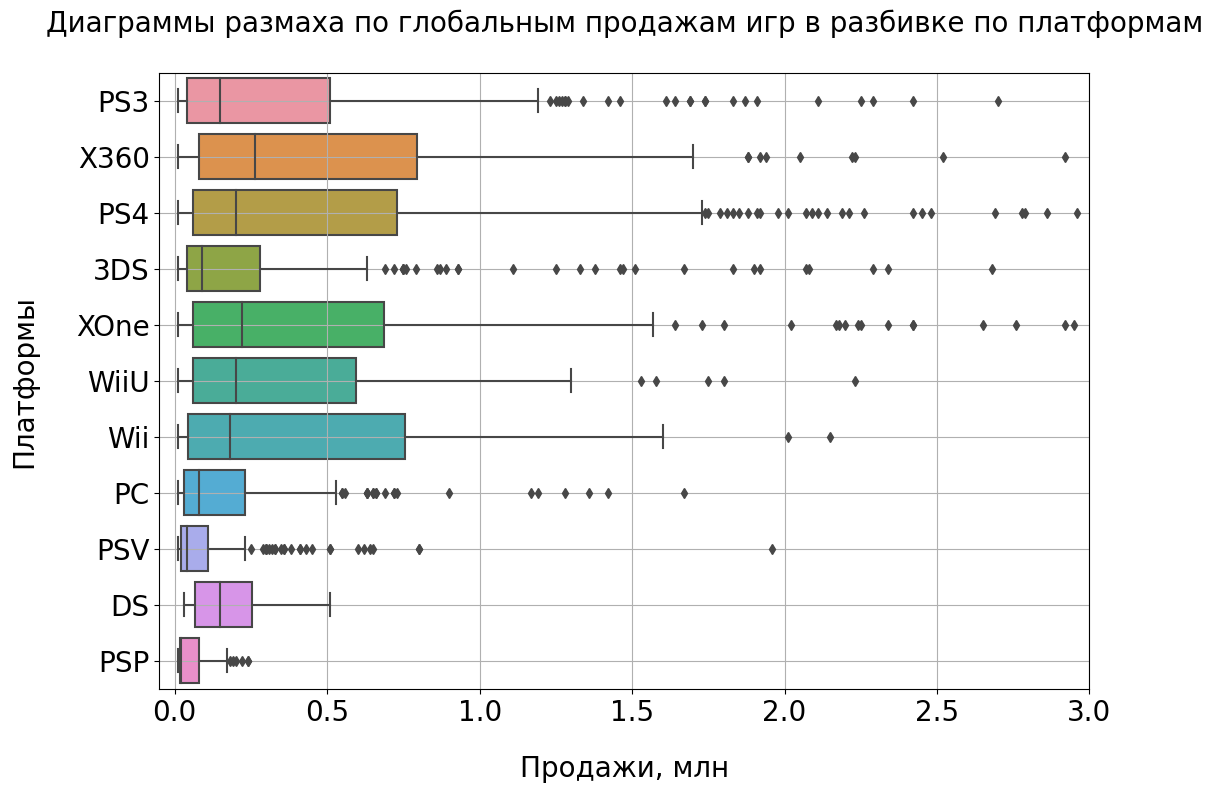

In [102]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=data.query('year_of_release >= 2013', engine='python'),
    x="total_sales", y="platform"
)

plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=20)
plt.grid('on')
plt.xlabel('Продажи, млн', fontsize=20, labelpad=20)
plt.ylabel('Платформы'+'\n', fontsize=20)
plt.tick_params(labelsize=20)
plt.xlim(-0.05, 3)
plt.show()

**Вывод:**  


+ Выбросы по продажам присутствуют у всех платформ, кроме DS;
+ Малое кол-во выбросов на платформах Wii;
+ Размах у платформ тоже различный. Например у 3DS, PC, PSV, DS, PSP он небольшой, что может говорить о схожести кол-ва продаж по играм;
+ Выделяющиеся платформы X360, PS4, XOne, Wii. Разница между медианой и 75 процентилем практически в 3 раза, а между максимумом и медианой в 5 раз. Можно предположить, что на этих платформах иногда выходили игры, которые имели очень большой коммерческий успех, продажи которых могут быть выше чем продажы остальных игр вместе взятых. Либо успех продаж этих платформ происходил скачком.

## 3.5 Анализ влияния отзывов на продажи на примере платформы `PS4`

Проанализируем как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [63]:
# делаем выборку
ps4 = (
    data
    .query('platform == "PS4" & year_of_release >= 2013', engine='python')
    .reset_index(drop=True)     
)

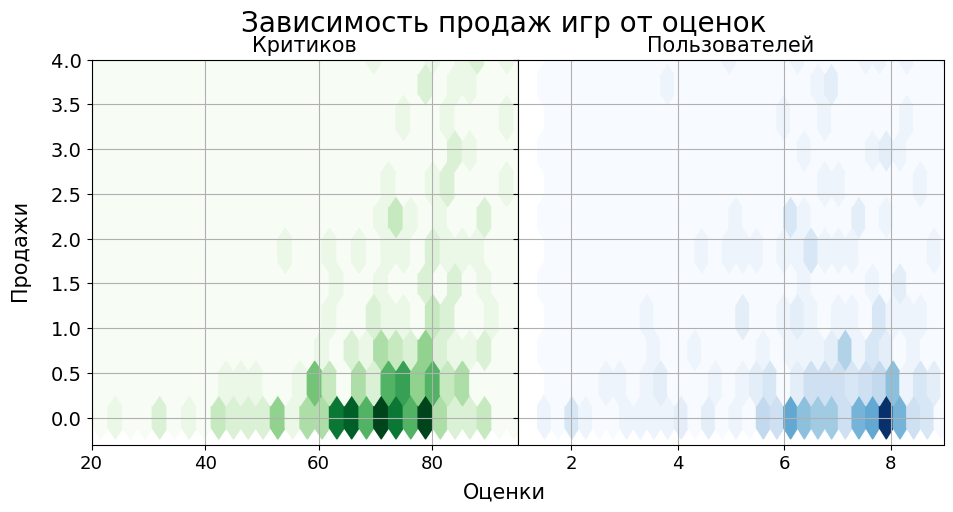

In [64]:
fig = plt.figure(figsize=(11, 5))
axs = fig.add_gridspec(1, 2, hspace=0.1, wspace=0.001).subplots()

fig.suptitle('Зависимость продаж игр от оценок', fontsize=20)
fig.text(0.5, 0.015, 'Оценки', ha='center', va='center', size=15)
fig.text(0.06, 0.5, 'Продажи', ha='center', va='center', rotation='vertical', size=15)


axs[0].hexbin(
    x=ps4['critic_score'], y=ps4['total_sales'],
    gridsize=30,
    cmap ='Greens')
axs[0].set_title('Критиков', fontsize= 15);
axs[0].set_xlim(20, 95)
axs[0].tick_params(axis='y', labelsize=14)

axs[1].hexbin(
    x=ps4['user_score'], y=ps4['total_sales'],
    gridsize=30,
    cmap ='Blues')
axs[1].set_title('Пользователей', fontsize= 15)
axs[1].set_xlim(1, 9)
axs[1].set_yticklabels([])

for i in range(2):
    axs[i].set_ylim(-0.3, 4)
    axs[i].tick_params(axis='x', labelsize=13)
    axs[i].grid(True) 
plt.show()

Найдем корреляцию:

In [65]:
print('Коэффициент корреляции по оценкам критиков: ', 
      round(ps4['critic_score'].corr(ps4['total_sales']), 2))
print('Коэффициент корреляции по оценкам пользователей: ', 
      round(ps4['user_score'].corr(ps4['total_sales']), 2))

Коэффициент корреляции по оценкам критиков:  0.41
Коэффициент корреляции по оценкам пользователей:  -0.03


**Вывод:**

+ Можно утверждать, что продажи игр зависят от оценок, как пользователей, так и критиков;
+ Основная подавляющая часть продаж сосредоточена в районе высоких оценок. Для пользователей это 5 баллов и выше, для критиков 55 и выше;
+ Судя по коэффициенту корреляции зависимость между продажами и оценками пользователей отсутствует. Но коэффициент учитывает только линейную зависимость. Глядя на диграмму рассеяния можно сказать, что основная часть продаж сосредоточена в раоне оценок 7.5-8.5 с выделяющимся пиком в 8 баллов;
+ Коэффициент корреляции между оценками критиков и продажами слабый. По диаграмме рассеяния можно сказать, что основная плотность сосредоточена в районе оценок 60-80, с 2 пиками - около 70 и 80. Здесь распределение значений более широкое, чем у оценок пользователей.

## 3.6 Анализ общего распределения игр по жанрам

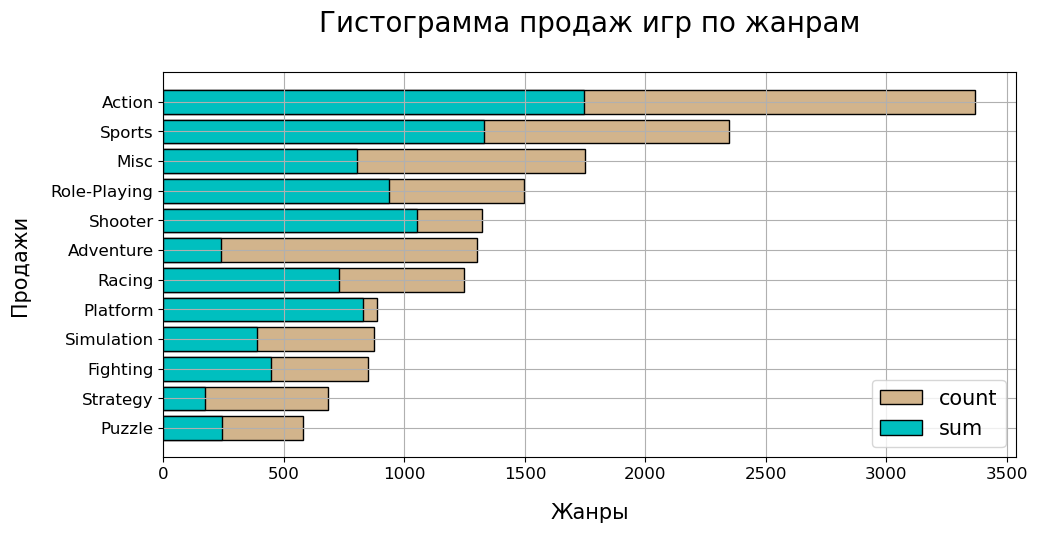

In [66]:
sales = data.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=['count', 'sum']
)
sales.columns = ['count', 'sum']
sales = sales.sort_values(by='count')


plt.figure(figsize=(11, 5))
plt.title('Гистограмма продаж игр по жанрам'+'\n', fontsize=20)
plt.xlabel('Жанры', fontsize=15, labelpad=15)
plt.ylabel('Продажи', fontsize=15, labelpad=15)
plt.grid('on')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.barh(sales.index, sales['count'], color='tan',edgecolor = 'black')
plt.barh(sales.index, sales['sum'], color='c',edgecolor = 'black')
plt.legend(sales.columns, fontsize=15, handlelength=2)
plt.show()

**Вывод:**

+ По гистограме можно сказать, что наибольшую популярность имеет жанр Action. Кол-во выпущенных игр, как и суммарное кол-во продаж лидирующее. На втором месте жанр Sports;
+ Наименьшую популярность по кол-ву игр имеет жанр Puzzle, чего не скажешь о его продажах - они на примерно одном уровне с жанрами Adventure и Strategy, хотя игр этих жанров выпущено бОльшее кол-во;
+ Жанр Platform и в меньшей степени жанры Shooter и Role-Playing выделяются тем, что имеют бОльшее кол-во продаж на кол-во выпущенных игр; 
+ Обратная ситуация с жанрами Adventure и Strategy - они имеют меньшее кол-во продаж при бОльшем кол-ве выпущенных игр.

> ***Примечание.*** Не всегда корректно ограничиваться сравнением суммарных продаж по жанрам. Ведь за высокими продажами какого-то жанра может скрываться множество мелких игры с низкими продажами. А за низкими суммарными продажами в жанре может скрываться небольшое число игр, но каждая из которых имеет высокие доходы. 

Посмотрим на средние продажи и оценим, как поменяются лидеры:

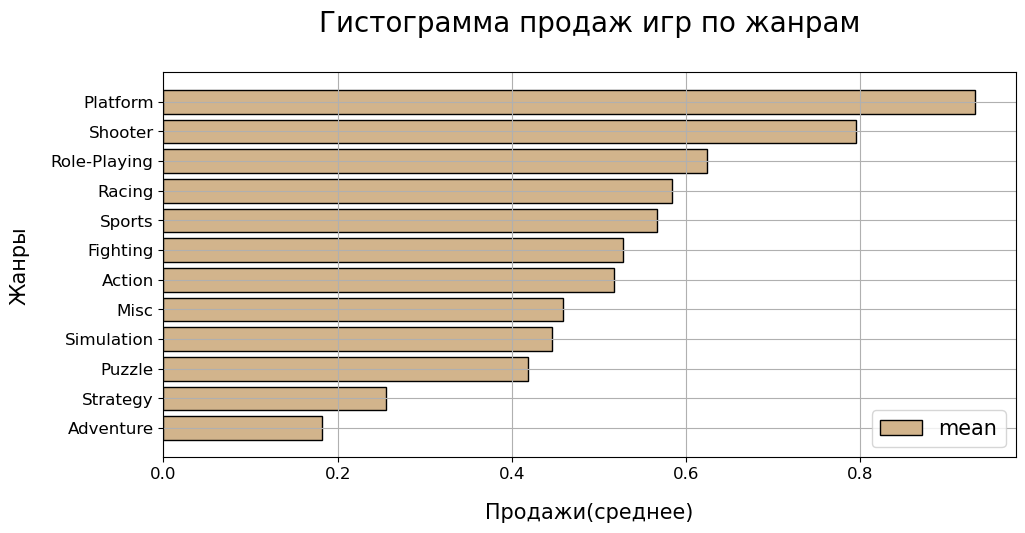

In [104]:
sales = data.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=['mean']
)
sales.columns = ['mean']
sales = sales.sort_values(by='mean')

plt.figure(figsize=(11, 5))
plt.title('Гистограмма продаж игр по жанрам\n', fontsize=20)
plt.xlabel('Продажи(среднее)', fontsize=15, labelpad=15)
plt.ylabel('Жанры', fontsize=15, labelpad=15)
plt.grid('on')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.barh(sales.index, sales['mean'], color='tan',edgecolor = 'black')
plt.legend(sales.columns, fontsize=15, handlelength=2)
plt.show()

**Вывод:**

Как и предполагалось, результаты совсем другие. Лидирующие жанры теперь Platform и Shooter, а Sport и Action где-то посередине, да и в целом распределение поменялось. Смотреть средние важно потому что продаются конкретные игры, а не жанры.

## 3.7 Портрет пользователей по регионам

In [68]:
data_actual = data.query('year_of_release >= 2013', engine='python')

### 3.7.1 Самые популярные платформы (топ-5)

Построим гистограммы распределения суммы продаж по **платформам** для каждого из регионов (NA, EU, JP):

In [107]:
# словарь регионов для анализа
region_list = {
    'na_sales': 'Северная Америка',
    'eu_sales': 'Европа',
    'jp_sales': 'Япония'
}

In [147]:
list(region_list.values())[1]

'Европа'

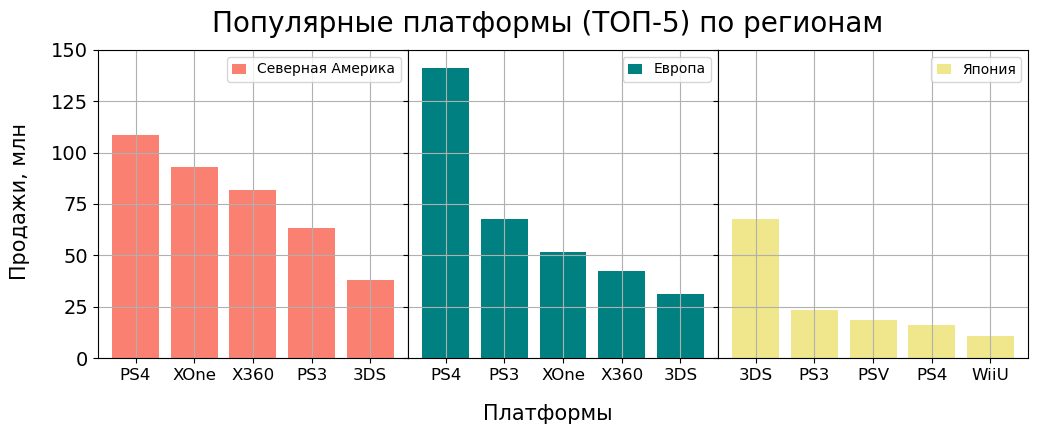

In [151]:
fig = plt.figure(figsize=(12, 4))
axs = fig.add_gridspec(1, 3, wspace=0.001).subplots()

fig.suptitle('Популярные платформы (ТОП-5) по регионам', fontsize=20)
fig.text(0.5, -0.03, 'Платформы', ha='center', va='center', size=15)
fig.text(0.06, 0.5, 'Продажи, млн', ha='center', va='center', rotation='vertical', size=15)
colors = ['salmon', 'teal', 'khaki']

for i, reg in enumerate(region_list): 
    top5 = (
        data_actual.pivot_table(
                index='platform',
                values=reg,
                aggfunc='sum')
            .sort_values(by=reg, ascending=False).head(5)
            )
    
    f = axs[i]
    
    f.bar(
        top5.index, 
        top5[reg],
        color=colors[i]
        )    
    f.tick_params(axis='x', labelsize=12)
    f.tick_params(axis='y', labelsize=14) 
    f.set_ylim([0, 150])
    f.grid('on')
    f.legend([region_list[reg]], fontsize=10, handlelength=1)
    if i != 0:
        f.set_yticklabels([])

**Вывод:**  

+ БОльшая часть продаж игр приходится на Северную Америку, меньшая на Японию;
+ В Америке и Европе геймеры предпочитают больше Xbox и PS;
+ Любовь к PS4 особенно выделяется у европейцев;
+ Японцы же больше тяготеют к Nintendo.

### 3.7.2 Самые популярные жанры (топ-5)

Аналогично построим гистограммы распределения суммы продаж по **жанрам** для каждого из регионов:

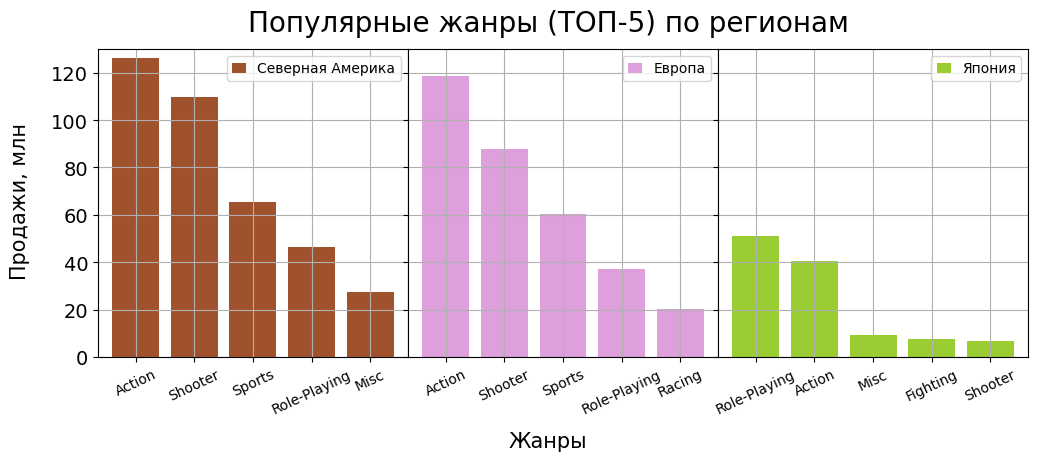

In [156]:
fig = plt.figure(figsize=(12, 4))
axs = fig.add_gridspec(1, 3, wspace=0.001).subplots()

fig.suptitle('Популярные жанры (ТОП-5) по регионам', fontsize=20)
fig.text(0.5, -0.1, 'Жанры', ha='center', va='center', size=15)
fig.text(0.06, 0.5, 'Продажи, млн', ha='center', va='center', rotation='vertical', size=15)
colors = ['sienna', 'plum', 'yellowgreen']

for i, reg in enumerate(region_list):
    top5 = (
        data_actual.pivot_table(
                index='genre',
                values=reg,
                aggfunc='sum')
            .sort_values(by=reg, ascending=False).head(5)
            )
    
    f = axs[i]
    
    f.bar(
        top5.index, 
        top5[reg],
        color=colors[i]
        )    
    f.tick_params(axis='x', labelsize=10, rotation=25)
    f.tick_params(axis='y', labelsize=14) 
    f.set_ylim([0, 130])
    f.grid('on')
    f.legend([region_list[reg]], fontsize=10, handlelength=1)
    if i != 0:
        f.set_yticklabels([])

**Вывод:**


+ В Америке и Европе геймеры больше предпочитают жанр Actions;
+ Распределения в Америке и Европе схожи, отличие лишь в том, что американцы предпочитаю жанр Misc, а европейцы Racing;
+ В Японии схожее распределение, но особенно выделяется и лидирует жанр Role-Playing. Так же Японцы меньше любят шутеры, зато любят файтинги.


## 3.7.3 Оценка влияния рейтинга на продажи по регионам

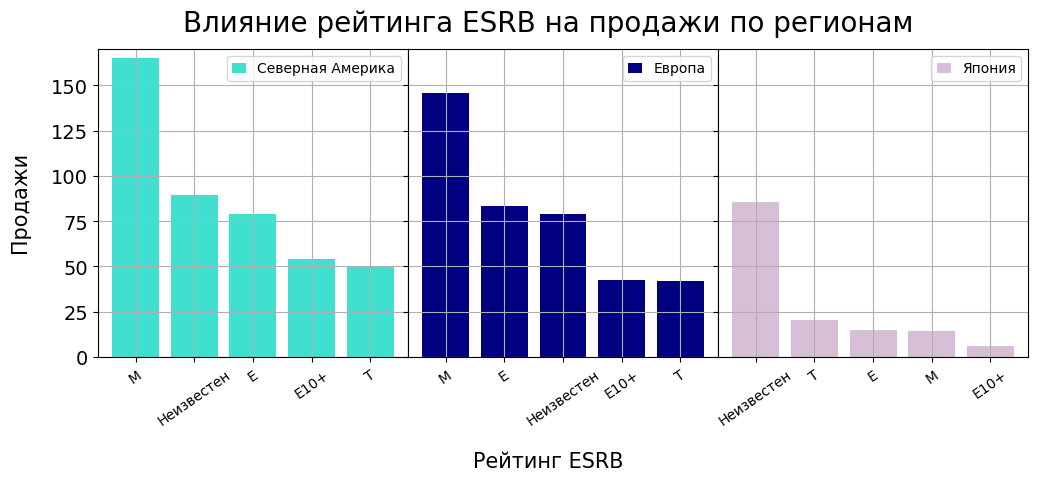

In [162]:
fig = plt.figure(figsize=(12, 4))
axs = fig.add_gridspec(1, 3, wspace=0.001).subplots()

fig.suptitle('Влияние рейтинга ESRB на продажи по регионам', fontsize=20)
fig.text(0.5, -0.15, 'Рейтинг ESRB', ha='center', va='center', size=15)
fig.text(0.06, 0.5, 'Продажи', ha='center', va='center', rotation='vertical', size=15)
colors = ['turquoise', 'navy', 'thistle']

for i, reg in enumerate(region_list):
    top5 = (
        data_actual.pivot_table(
                index='rating',
                values=reg,
                aggfunc='sum')
            .sort_values(by=reg, ascending=False)
            )
    
    f = axs[i]
    
    f.bar(
        top5.index, 
        top5[reg],
        color=colors[i]
        )
    
    f.tick_params(axis='x', labelsize=10, rotation=35)
    f.tick_params(axis='y', labelsize=14) 
    f.set_ylim([0, 170])
    f.grid('on')
    f.legend([region_list[reg]], fontsize=10, handlelength=1)
    if i != 0:
        f.set_yticklabels([])

И тоже самое в процентах:

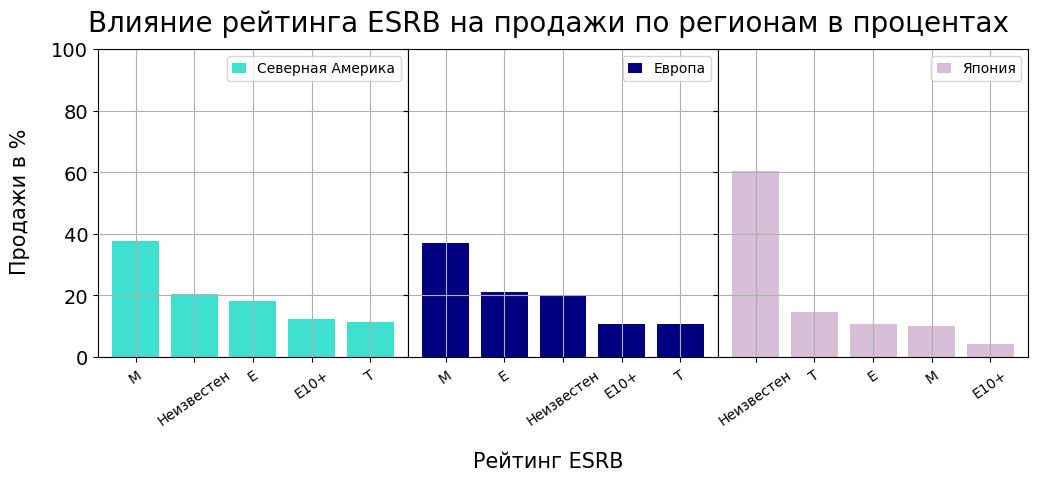

In [161]:
df = (
    data_actual                     
      .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]   
      .agg('sum')                                                
      .apply(lambda x: 100 * x / float(x.sum()))    # считает проценты        
    )

fig = plt.figure(figsize=(12, 4))
axs = fig.add_gridspec(1, 3, wspace=0.001).subplots()

fig.suptitle('Влияние рейтинга ESRB на продажи по регионам в процентах', fontsize=20)
fig.text(0.5, -0.15, 'Рейтинг ESRB', ha='center', va='center', size=15)
fig.text(0.06, 0.5, 'Продажи в %', ha='center', va='center', rotation='vertical', size=15)
colors = ['turquoise', 'navy', 'thistle']

for i in range(len(df.columns)): 

    f = axs[i]
    
    f.bar(
        df.sort_values(by=df.columns[i], ascending=False).index,
        df[df.columns[i]].sort_values(ascending=False),
        color=colors[i]
        )
    f.tick_params(axis='x', labelsize=10, rotation=35)
    f.tick_params(axis='y', labelsize=14) 
    f.set_ylim([0, 100])
    f.grid('on')
    f.legend([list(region_list.values())[i]], fontsize=10, handlelength=1)
    if i != 0:
        f.set_yticklabels([])

**Вывод:** 

+ Распределение по рейтингу игр практически идентичное у Северной Америки и Европы;
+ Несмотря на большое кол-во пропусков, игры с рейтингом "М" уверенно лидируют. Американцы и европейцы очень любят игры с контентом для взрослых;
+ Япония снова на своей волне - игры с рейтингом "М" продаются гораздо реже. Возможно, это связано с ограничениями внутри страны;
+ При этом в Японии очень любят игры для подростков с рейтингом "Т". Теперь понятно из-за чего такая любовь к Nintendo;
+ Для Японии кол-во пропусков в этом столбце крайне большое. Из этого можно сделать вывод о необходимости дополнительного сбора информации для корректного ответа на вопрос о взаимосвязи рейтинга и продаж. 

# 4 Проверка гипотез

Проверка статистических гипотез всегда начинается с их формулирования. Сначала формулируется нулевая гипотеза H₀ и исходя из неё формулируется альтернативная гипотеза H₁. H₀ всегда формулируется так, чтобы использовать знак равенства.  
Чтобы понять стоит ли отвергать нулевую гипотезу, определим уровень значимости (alpha), который установит границы вероятности попасть слишком далеко от центра распределения. В нашем датасете присутствует большое кол-во пропусков. Поэтому пороговое значение alpha зададим равным 0.05


In [74]:
alpha = 0.05

## 4.1 Гипотеза 1

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

**Альтернативная гиоптеза:** Средние пользовательские рейтинги платформ Xbox One и PC разные.

Гипотеза двусторонняя, т.к. возможно отклонение, как в большую, так и в меьншую сторону. Для её проверки будем принять t-тест:

In [75]:
result_1 = st.ttest_ind(
    data.query('platform == "XOne"')['user_score'],
    data.query('platform == "PC"')['user_score'],
    equal_var = False,
    nan_policy='omit'
)

print('p-значение:', result_1.pvalue.round(6))

print(
    ("Отвергаем нулевую гипотезу", "Не получилось отвергнуть нулевую гипотезу")
    [bool(result_1.pvalue > alpha)]
)

p-значение: 5e-06
Отвергаем нулевую гипотезу


**Вывод:**

Вероятность выхода значения за границы интервала 0.0005%. Поэтому можно утверждать, что средние пользовательские рейтинги платформ Xbox One и PC статистически значимо различаются.

## 4.2 Гипотеза 2


**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

**Альтернативная гиоптеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза так же двусторонняя. Аналогично **п.4.1** применим t-тест:

In [76]:
result_2 = st.ttest_ind(
    data.query('genre == "Action" & user_score.notna()')['user_score'],
    data.query('genre == "Sports" & user_score.notna()')['user_score'],
    equal_var = False
)

print('p-значение:', result_2.pvalue.round(2))

print(
    ("Отвергаем нулевую гипотезу", "Не получилось отвергнуть нулевую гипотезу")
    [bool(result_2.pvalue > alpha)]
)

p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Вероятность выхода значения за границы интервала 11%. Поэтому нельзя однозначно утверждать, что средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-warning" role="alert"; style="border:groove rgb(57,136,235) 5px; padding: 40px">

<h1 align="center", style="margin-bottom: 15px">ВЫВОДЫ</h1>

<div align="justify">$\;\;\;\;\;\;\;\;$В результате работы был проведен исследовательский анализ данных о продажах компьютерных игр интернет-магазина "Стримчик", в ходе которого был определен потенциально популярный продукт на грядущий год. Для планирования рекламной кампании я бы рекомендовал заказчику делать бОльший акцент на лидеров рынка:</div>

<table>
<tr>
  <th>Категория</th>
  <th>Продукт</th>
</tr>
<tr>
  <td>По платформам</td>
  <th>PS4, XOne</th>
</tr>
<tr>
  <td>По жанрам</td>
  <th>Platform, Shooter</th>
</tr>
<tr>
  <td>По региону</td>
  <th>Северная Америка, Европа</th>
</tr>
</table>

## Итоги исследовательского анализа:

**По платформам:**
+ к потенциально прибыльным платформам на момент проведения исследования можно отнести PS4 и XOne
+ наибольшее кол-во проданых игр пренадлежит плотформам DS, PS, PS2, PS3, X360, Wii
+ наибольшие сумарные продажи были у платформ Wii, X360, PS3, PS2 в 2005-2011гг
+ продажи игр на PS3 резко начали падать с выходом PS4 в 2013 году, что логично, та же картина наблюдается и у X360 с XOne
+ выбросы по продажам присутствуют у всех платформ, кроме DS, Wii
+ выделяющиеся платформы X360, PS4, XOne, Wii. Разница между медианой и 75 процентилем практически в 3 раза, а между максимумом и медианой в 5 раз. Можно предположить, что на этих платформах иногда выходили игры, которые имели очень большой коммерческий успех, продажи которых могут быть выше чем продажы остальных игр вместе взятых

**По жанрам:**
+ наибольшую популярность среди игровых жанров имеет жанр Platform, на втором месте жанр Shooter
+ наименьшую популярность среди игровых жанров имеют жанры Adventure и Strategy
+ жанр Platform и в меньшей степени жанры Shooter и Role-Playing выделяются тем, что имеют бОльшее кол-во продаж на кол-во выпущенных игр
+ обратная ситуация с жанрами Adventure и Strategy - они имеют меньшее кол-во продаж при бОльшем кол-ве выпущенных игр

**По регионам:**
+ бОльшая часть продаж игр приходится на Северную Америку, меньшая на Японию
+ в Америке и Европе геймеры предпочитают платформы Xbox и PS
+ в Америке и Европе геймеры предпочитают жанр Actions
+ распределения в Америке и Европе схожи, отличие лишь в том, что американцы предпочитаю жанр Misc, а европейцы Racing
+ любовь к PS4 особенно выделяется у европейцев
+ японцы больше тяготеют к Nintendo
+ в Японии особенно выделяется и лидирует жанр Role-Playing. Так же Японцы меньше любят шутеры, зато любят файтинги.

**По годам:**
+ пик продаж пришелся на 2008-2009 годы. Периодом активного выхода игр условно можно считать 2002-2016 годы. Фаза роста продаж игр началась с 1993 года
+ в 2016 году спад по продажам игр наблюдался для всех игровых платформ
+ примерный жизненный цикл современных платформ составляет в среднем 10 лет
+ можно предположить, что следующая смена произошла бы в 2020 году
+ у большинства платформ на графиках наблюдается спад продаж, платформы устаревают

**По рейтингам:**
+ распределение игр по рейтингу у Северной Америки и Европы практически идентичное
+ игры с рейтингом "М" в Северной Америке и Европе лидируют. Американцы и европейцы очень любят игры с контентом для взрослых
+ Япония на своей волне - игры с рейтингом "М" продаются гораздо реже. Возможно, это связано с ограничениями внутри страны
+ при этом в Японии очень любят игры для подростков с рейтингом "Т"
<p style="margin-bottom: 40px"></p>

**В ходе исследования были выдвинуты и проверены 2 гипотезы:**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **не подтвердилась**. Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо различаются.

2. Средние пользовательские рейтинги жанров Action и Sports одинаковые - **не отвергается**. Нет оснований полагать, что средние пользовательские рейтинги жанров Action и Sports разные.